<a href="https://colab.research.google.com/github/mukul9155/Yes-bank-closing-price-prediction/blob/main/Yes_bank_close_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as seabornInstance

# Importing machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# insert the data file
path = '/content/drive/MyDrive/Colab Notebooks/yes bank close price prediction/data_YesBank_StockPrices.csv'

In [4]:
# Importing the dataset
df = pd.read_csv(path)

In [5]:
# Importing the dataset
df = pd.DataFrame(df)

More understanding of the data

In [6]:
# Viewing top 5 rows of the data
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [7]:
# View of bottom 5 rows of the data
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [8]:
# Knowing the rows and columns of the data
df.shape

(185, 5)

In [9]:
# Getting the list of columns
list(df.columns)

['Date', 'Open', 'High', 'Low', 'Close']

# **Description of columns**



*   Date -  Date on which stock market is live for trading

*   Open -  The initial price of share at which market open on that   particular day

*  High -  Maximum price of share at any time on that particular day 
*  Low  -  Minimum price of share at any time on that particular day
*  Close-  The final price of share at which market closes on that particular 
day














In [10]:
# Finding the data types of the columns
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

# Checking for missing and duplicate values

In [11]:
# Checking the null values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [12]:
# Cecking of null values using boolean
df.isna().any()

Date     False
Open     False
High     False
Low      False
Close    False
dtype: bool

In [13]:
# Checking the duplicate values
len(df[df.duplicated()])

0

In [14]:
# Details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


Here we have seen that all 185 entries are present and there is no null values,
Out of which 4- float data type and 1- object data type. So, There is no need to do the calculation regarding missing values. 

# Description of dataset to find insights from the data

In [15]:
# Description of data
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [16]:
# Rows and columns of data
df.shape

(185, 5)

# Exploratory data analysis of the given dataset

In [17]:
# Finding the corelation of the data 
df.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


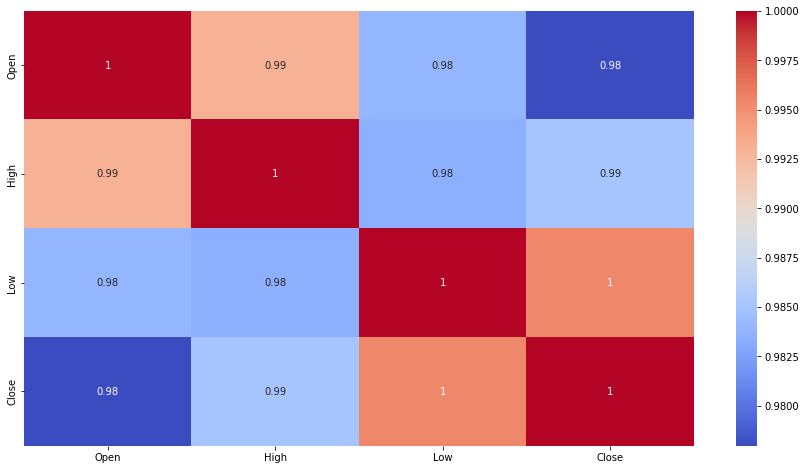

In [18]:
# showing the corelation with graph
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

**Bar plot of dependent variable with independent variables**



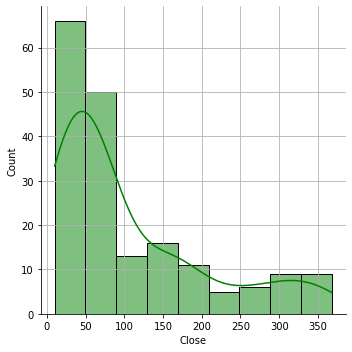

In [51]:
sns.displot(df['Close'], kde = True, color='g')
plt.grid()
plt.show()

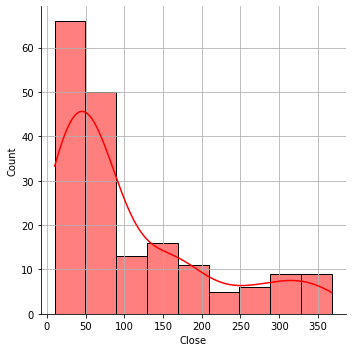

In [52]:
sns.displot(df['Close'], kde = True, color='r')
plt.grid()
plt.show()

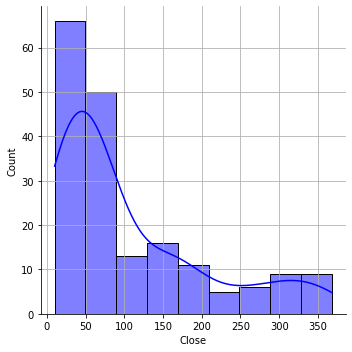

In [53]:
sns.displot(df['Close'], kde = True, color='b')
plt.grid()
plt.show()

**Scatter plot of dependent variable with independent variables**

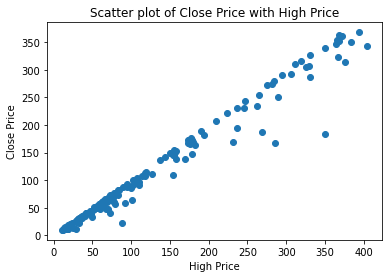

In [54]:
plt.scatter(df['High'], df['Close'],alpha=1.0)
plt.title('Scatter plot of Close Price with High Price')
plt.xlabel('High Price')
plt.ylabel('Close Price')
plt.show()

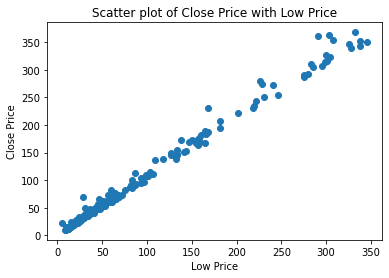

In [55]:
plt.scatter(df['Low'], df['Close'],alpha=1.0)
plt.title('Scatter plot of Close Price with Low Price')
plt.xlabel('Low Price')
plt.ylabel('Close Price')
plt.show()

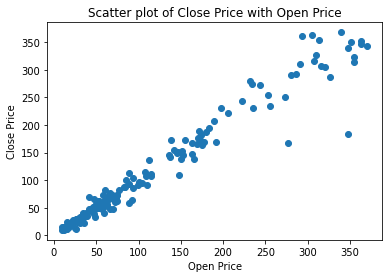

In [56]:
plt.scatter(df['Open'], df['Close'],alpha=1.0)
plt.title('Scatter plot of Close Price with Open Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

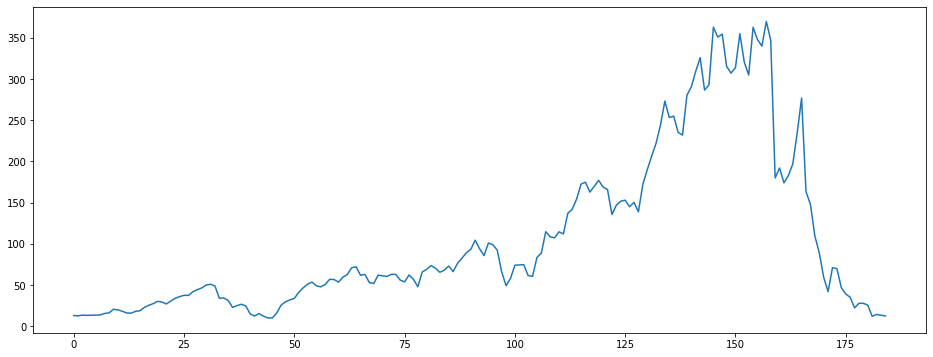

In [25]:
df['Open'].plot(figsize=(16,6))
plt.show()

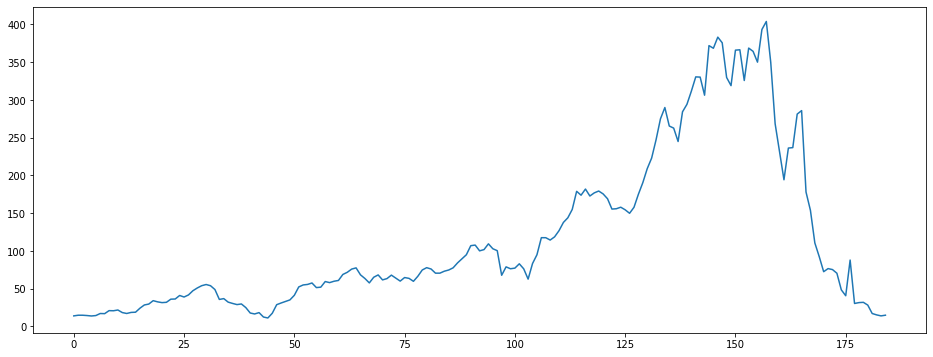

In [26]:
df['High'].plot(figsize=(16,6))
plt.show()

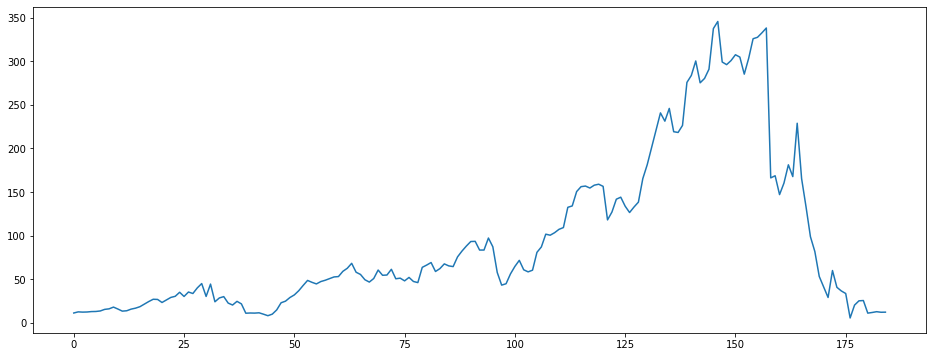

In [27]:
df['Low'].plot(figsize=(16,6))
plt.show()

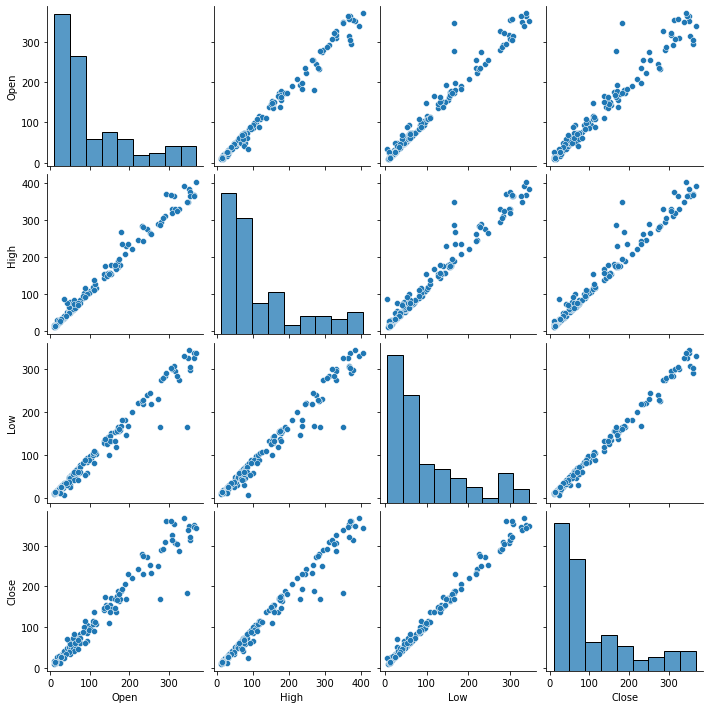

In [28]:
sns.pairplot(df)
plt.show()

Since independent variables(open, high, low) have linear relation with dependent variable 'close', So, I am using some linear models for prediction close price.

# Implementing Linear Regression

In [29]:
# Create the data of independent variables
x = df[['High','Open', 'Low']].values

# Create the data of dependent variable 
y = df[['Close']].values

In [60]:
x.shape

(185, 3)

In [61]:
y.shape

(185, 1)

In [30]:
print(x)

[[ 14.    13.    11.25]
 [ 14.88  12.58  12.55]
 [ 14.87  13.48  12.27]
 [ 14.47  13.2   12.4 ]
 [ 13.88  13.35  12.88]
 [ 14.44  13.49  13.  ]
 [ 17.16  13.68  13.58]
 [ 16.97  15.5   15.4 ]
 [ 20.95  16.2   16.02]
 [ 20.8   20.56  18.02]
 [ 21.8   19.8   15.8 ]
 [ 18.4   18.2   13.4 ]
 [ 17.2   16.    13.82]
 [ 18.6   15.9   15.7 ]
 [ 18.88  18.    16.8 ]
 [ 24.2   18.78  18.5 ]
 [ 28.47  22.8   21.4 ]
 [ 29.66  25.4   24.4 ]
 [ 34.16  27.4   27.  ]
 [ 32.6   30.2   26.8 ]
 [ 31.58  29.3   23.31]
 [ 31.99  27.    26.2 ]
 [ 36.14  30.66  29.11]
 [ 36.38  33.89  30.4 ]
 [ 41.04  35.98  35.02]
 [ 39.    37.5   30.2 ]
 [ 41.75  37.4   35.3 ]
 [ 47.3   41.8   33.6 ]
 [ 50.98  44.4   40.02]
 [ 54.    46.4   45.  ]
 [ 55.56  49.99  30.24]
 [ 53.97  50.88  44.4 ]
 [ 48.9   48.9   24.11]
 [ 35.8   33.9   28.51]
 [ 36.88  34.3   30.03]
 [ 32.22  31.22  22.62]
 [ 30.5   22.85  20.4 ]
 [ 28.98  25.    24.62]
 [ 29.8   26.68  21.7 ]
 [ 25.    24.6   11.01]
 [ 17.8   14.79  11.25]
 [ 16.56  12.4  

In [31]:
print(y)

[[ 12.46]
 [ 13.42]
 [ 13.3 ]
 [ 12.99]
 [ 13.41]
 [ 13.71]
 [ 15.33]
 [ 16.12]
 [ 20.08]
 [ 19.49]
 [ 18.03]
 [ 15.62]
 [ 16.16]
 [ 17.84]
 [ 18.46]
 [ 22.78]
 [ 25.32]
 [ 26.97]
 [ 30.16]
 [ 28.63]
 [ 28.14]
 [ 30.31]
 [ 33.51]
 [ 35.98]
 [ 37.93]
 [ 36.99]
 [ 41.36]
 [ 43.48]
 [ 46.18]
 [ 49.81]
 [ 50.54]
 [ 49.42]
 [ 33.75]
 [ 34.06]
 [ 31.13]
 [ 22.85]
 [ 25.45]
 [ 26.83]
 [ 24.13]
 [ 13.58]
 [ 12.26]
 [ 15.03]
 [ 12.24]
 [ 10.26]
 [  9.98]
 [ 15.45]
 [ 25.12]
 [ 29.68]
 [ 31.93]
 [ 33.45]
 [ 40.99]
 [ 47.31]
 [ 50.57]
 [ 53.41]
 [ 49.84]
 [ 47.32]
 [ 50.97]
 [ 57.1 ]
 [ 57.57]
 [ 53.83]
 [ 58.99]
 [ 62.22]
 [ 70.3 ]
 [ 71.86]
 [ 61.21]
 [ 62.54]
 [ 52.59]
 [ 51.29]
 [ 61.98]
 [ 61.02]
 [ 60.07]
 [ 62.38]
 [ 62.13]
 [ 55.61]
 [ 54.5 ]
 [ 62.9 ]
 [ 54.49]
 [ 47.72]
 [ 65.99]
 [ 69.14]
 [ 73.46]
 [ 70.07]
 [ 66.02]
 [ 67.83]
 [ 72.85]
 [ 65.97]
 [ 76.44]
 [ 82.29]
 [ 88.48]
 [ 92.84]
 [104.41]
 [ 94.5 ]
 [ 85.71]
 [100.28]
 [ 97.49]
 [ 92.2 ]
 [ 64.76]
 [ 48.65]
 [ 57.5 ]
 [ 73.76]


In [32]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [33]:
# Finding the rows and coloumns of train and test data
print(x_train.shape)
print(x_test.shape)

(148, 3)
(37, 3)


In [34]:
# Calling the model
reg = LinearRegression()

In [35]:
# Fitting Multiple Linear Regression to the Training set
reg.fit(x_train,y_train)

LinearRegression()

In [36]:
x_train

array([[155.  , 142.08, 134.  ],
       [ 20.95,  16.2 ,  16.02],
       [100.4 ,  92.4 ,  57.71],
       [ 72.55,  59.5 ,  40.95],
       [ 17.51,  10.04,   9.94],
       [ 78.94,  49.2 ,  44.8 ],
       [ 52.06,  47.8 ,  47.3 ],
       [ 41.04,  35.98,  35.02],
       [ 55.56,  49.99,  30.24],
       [ 28.3 ,  25.6 ,  11.1 ],
       [100.15,  94.  ,  83.42],
       [ 15.34,  14.3 ,  12.75],
       [ 40.7 ,  39.1 ,  33.6 ],
       [ 32.6 ,  30.2 ,  26.8 ],
       [330.58, 309.6 , 300.2 ],
       [ 77.88,  69.  ,  66.2 ],
       [366.  , 314.  , 307.35],
       [ 28.47,  22.8 ,  21.4 ],
       [ 52.34,  41.2 ,  36.8 ],
       [ 60.08,  56.  ,  51.2 ],
       [366.5 , 355.  , 304.65],
       [ 17.8 ,  14.79,  11.25],
       [117.6 ,  88.8 ,  86.98],
       [ 36.14,  30.66,  29.11],
       [118.69, 107.4 , 103.31],
       [ 92.4 ,  89.2 ,  53.15],
       [364.4 , 362.85, 325.7 ],
       [ 70.6 ,  65.45,  62.14],
       [109.43, 100.99,  97.2 ],
       [155.5 , 135.61, 127.  ],
       [ 4

In [37]:
x_test

array([[ 35.8 ,  33.9 ,  28.51],
       [154.52, 153.  , 133.71],
       [ 70.5 ,  70.  ,  40.7 ],
       [143.91, 137.1 , 132.44],
       [ 68.88,  59.4 ,  59.01],
       [ 34.16,  27.4 ,  27.  ],
       [245.  , 235.4 , 218.25],
       [ 16.97,  15.5 ,  15.4 ],
       [ 14.44,  13.49,  13.  ],
       [236.3 , 182.85, 181.15],
       [325.8 , 320.7 , 285.1 ],
       [110.6 , 109.6 ,  81.75],
       [157.96, 151.73, 144.03],
       [ 63.39,  60.4 ,  54.8 ],
       [350.1 , 348.  , 327.35],
       [281.3 , 234.6 , 228.8 ],
       [ 76.  ,  70.9 ,  68.21],
       [ 28.98,  25.  ,  24.62],
       [284.31, 231.98, 226.3 ],
       [ 57.58,  53.6 ,  46.42],
       [ 11.24,  10.  ,   8.16],
       [126.85, 114.6 , 107.18],
       [178.05, 163.3 , 133.05],
       [ 60.94,  53.55,  53.02],
       [223.  , 206.4 , 201.14],
       [ 76.65,  42.  ,  29.05],
       [290.  , 273.3 , 231.2 ],
       [ 13.88,  13.35,  12.88],
       [114.46, 108.43, 100.44],
       [ 63.54,  62.98,  49.39],
       [40

In [38]:
y_train

array([[154.57],
       [ 20.08],
       [ 64.76],
       [ 41.45],
       [ 15.45],
       [ 57.5 ],
       [ 50.97],
       [ 37.93],
       [ 50.54],
       [ 11.95],
       [ 85.71],
       [ 13.15],
       [ 34.55],
       [ 28.63],
       [326.14],
       [ 73.46],
       [354.45],
       [ 25.32],
       [ 47.31],
       [ 54.5 ],
       [322.25],
       [ 12.26],
       [113.89],
       [ 33.51],
       [114.33],
       [ 59.5 ],
       [346.2 ],
       [ 67.83],
       [ 97.49],
       [145.92],
       [ 43.48],
       [ 92.84],
       [108.38],
       [149.38],
       [ 14.37],
       [100.28],
       [ 70.3 ],
       [ 13.3 ],
       [ 53.83],
       [ 74.02],
       [188.73],
       [ 10.26],
       [ 18.03],
       [104.41],
       [ 55.61],
       [ 26.85],
       [108.7 ],
       [176.52],
       [136.83],
       [ 48.65],
       [350.  ],
       [ 27.95],
       [ 40.99],
       [151.82],
       [ 92.2 ],
       [ 61.21],
       [206.39],
       [ 15.03],
       [ 61.02

In [57]:
# Actual close price on test data
y_test

array([[ 34.06],
       [145.23],
       [ 46.95],
       [142.08],
       [ 62.22],
       [ 30.16],
       [231.26],
       [ 16.12],
       [ 13.71],
       [194.3 ],
       [304.9 ],
       [ 91.3 ],
       [153.3 ],
       [ 62.38],
       [339.6 ],
       [275.05],
       [ 71.86],
       [ 26.83],
       [279.1 ],
       [ 49.84],
       [  9.98],
       [111.7 ],
       [147.95],
       [ 58.99],
       [221.3 ],
       [ 70.45],
       [250.85],
       [ 13.41],
       [108.21],
       [ 52.59],
       [343.4 ],
       [361.96],
       [ 76.44],
       [163.31],
       [ 41.36],
       [ 47.32],
       [253.52]])

In [40]:
# Finding the intercept of the model
reg.intercept_

array([1.44956834])

In [41]:
# Finding the coefficient of the model
reg.coef_

array([[ 0.46406454, -0.4404148 ,  1.0142898 ]])

In [42]:
# Predicting close price of train data 
y_pred_train = reg.predict(x_train)

In [43]:
#Predicted close price on the test data
y_pred_test = reg.predict(x_test)

In [44]:
#Predicted Close price on the test data
y_pred_test

array([[ 32.05041945],
       [141.39404628],
       [ 44.6186774 ],
       [142.1847688 ],
       [ 67.10693606],
       [ 32.62047222],
       [232.84048635],
       [ 18.11837716],
       [ 15.39523209],
       [214.31677099],
       [300.57479208],
       [ 87.42383581],
       [154.01722588],
       [ 59.84864685],
       [342.68198056],
       [260.7391185 ],
       [ 74.67777157],
       [ 28.85960368],
       [260.75411505],
       [ 51.64750396],
       [ 10.53811057],
       [118.55620032],
       [147.10778122],
       [ 59.92309426],
       [218.04859715],
       [ 47.9878126 ],
       [250.16672269],
       [ 15.07529924],
       [108.6874867 ],
       [ 53.2946785 ],
       [368.83014088],
       [339.95761347],
       [ 73.72840345],
       [167.96544878],
       [ 40.15717944],
       [ 48.9966109 ],
       [262.36562296]])

# Train dataset performance

In [45]:
# Calculating the errors of train data
print('Mean Absolute Error:',metrics.mean_absolute_error(y_train,y_pred_train))
print('Mean Squared error:',metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Mean Absolute Error: 3.967317950568311
Mean Squared error: 41.07000603866699
Root Mean Squared error: 6.408588459143479


In [58]:
# Finding the accuracy of train data
r2_score(y_train, y_pred_train)

0.9954546486753905

# Test dataset performance

In [46]:
# Calculating the errors of test data
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared error:',metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 5.397623269661969
Mean Squared error: 77.87298624685229
Root Mean Squared error: 8.824567198840535


In [47]:
# Finding the accuracy of train data
r2_score(y_train, y_pred_train)

0.9954546486753905

In [48]:
# Finding the accuracy of test data
r2_score(y_test, y_pred_test)

0.9930815866308079

In [49]:
# Comparing the actual and predicted colse price of the stock
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_test.flatten()})
df1

,Actual,Predicted
0,34.06,32.050419
1,145.23,141.394046
2,46.95,44.618677
3,142.08,142.184769
4,62.22,67.106936
5,30.16,32.620472
6,231.26,232.840486
7,16.12,18.118377
8,13.71,15.395232
9,194.30,214.316771


# Graphical representaion of actual and predicted price

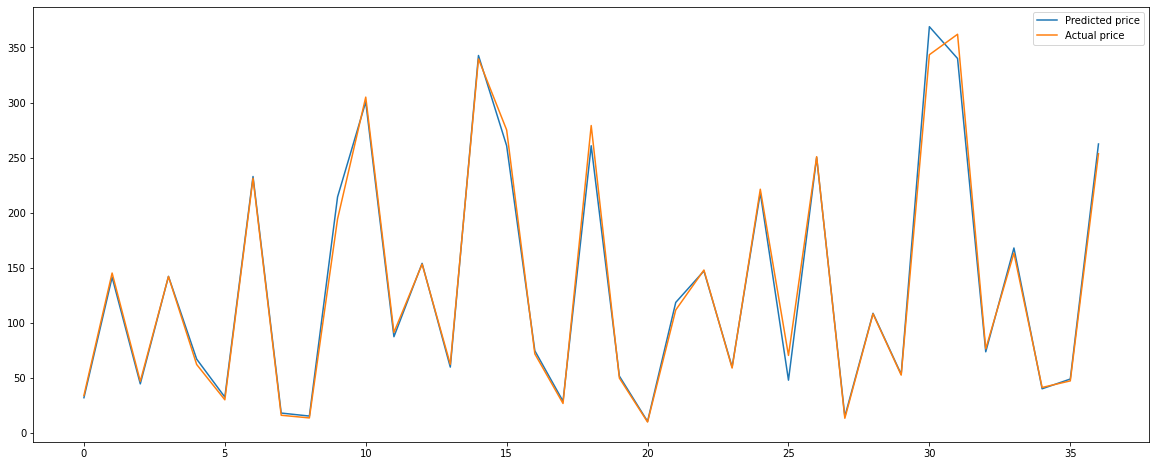

In [62]:
# Line plot of Actual and Predicted closing price of test dataset
plt.figure(figsize=(20,8))
plt.plot(y_pred_test)
plt.plot(y_test)
plt.legend(["Predicted price","Actual price"])
plt.show()